#### Model Training

#### 1.1 Import Data and Required Packages

Import Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [48]:
# Basic Import
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings 

#### Import the CSV Data as Pandas DataFrame

In [49]:
df = pd.read_csv('data/stud.csv')

#### Show top 5 Records

In [50]:
df.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

Preparing X and Y variables

In [51]:
X=df.drop(columns=['math_score'])
y=df['math_score']

In [52]:
X.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  reading_score  writing_score  
0                    none             72             74  
1               completed             90             88  
2                    none             95             93  
3                    none             57             44  
4                    none             78             75

In [53]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
onehotencoder_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",onehotencoder_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features),
    ]
)

In [54]:
X = preprocessor.fit_transform(X)

In [55]:
from sklearn.model_selection import train_test_split

# Separate dataset into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Create an Evaluate Function to give all metrics after Model Training

In [56]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae, rmse, r2_square

In [57]:
models = {
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest Regressor":DecisionTreeRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(),
    "AdaBoost Regressor":AdaBoostRegressor()
    }
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train) # Train model
    
    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print(" - Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print(" - Mean Absolute Error: {:.4f}".format(model_train_mae))
    print(" - R2 Score: {:.4f}".format(model_train_r2))
    
    print(".........................")
    
    print('Model performance for Test set')
    print(" - Root Mean Squared Error: {:.4f}".format(model_test_rmse ))
    print(" - Mean Absolute Error: {:.4f}".format(model_test_mae))
    print(" - R2 Score: {:.4f}".format(model_test_r2))
    
    r2_list .append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
 - Root Mean Squared Error: 5.3231
 - Mean Absolute Error: 4.2667
 - R2 Score: 0.8743
.........................
Model performance for Test set
 - Root Mean Squared Error: 5.3940
 - Mean Absolute Error: 4.2148
 - R2 Score: 0.8804


Lasso
Model performance for Training set
 - Root Mean Squared Error: 6.5938
 - Mean Absolute Error: 5.2063
 - R2 Score: 0.8071
.........................
Model performance for Test set
 - Root Mean Squared Error: 6.5197
 - Mean Absolute Error: 5.1579
 - R2 Score: 0.8253


Ridge
Model performance for Training set
 - Root Mean Squared Error: 5.3233
 - Mean Absolute Error: 4.2650
 - R2 Score: 0.8743
.........................
Model performance for Test set
 - Root Mean Squared Error: 5.3904
 - Mean Absolute Error: 4.2111
 - R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
 - Root Mean Squared Error: 5.7079
 - Mean Absolute Error: 4.5168
 - R2 Score: 0.8555
.........................
Mod

XGBRegressor
Model performance for Training set
 - Root Mean Squared Error: 1.0073
 - Mean Absolute Error: 0.6875
 - R2 Score: 0.9955
.........................
Model performance for Test set
 - Root Mean Squared Error: 6.4733
 - Mean Absolute Error: 5.0577
 - R2 Score: 0.8278


Learning rate set to 0.039525
0:	learn: 14.5987177	total: 2.36ms	remaining: 2.36s
1:	learn: 14.2251886	total: 4.41ms	remaining: 2.2s
2:	learn: 13.8866124	total: 6.09ms	remaining: 2.02s
3:	learn: 13.5235688	total: 7.8ms	remaining: 1.94s
4:	learn: 13.1887021	total: 9.26ms	remaining: 1.84s
5:	learn: 12.9124226	total: 10.6ms	remaining: 1.76s
6:	learn: 12.6000335	total: 12.2ms	remaining: 1.73s
7:	learn: 12.3299057	total: 13.8ms	remaining: 1.71s
8:	learn: 12.0660619	total: 15.8ms	remaining: 1.74s
9:	learn: 11.7730981	total: 17.2ms	remaining: 1.7s
10:	learn: 11.4922764	total: 18.7ms	remaining: 1.68s
11:	learn: 11.2626483	total: 22.4ms	remaining: 1.85s
12:	learn: 11.0426039	total: 24ms	remaining: 1.82s
13:	learn: 10.799

#### Result 

In [58]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model_Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

Model_Name  R2_Score
2                    Ridge  0.880593
0        Linear Regression  0.880433
7        CatBoostRegressor  0.851632
8       AdaBoost Regressor  0.846955
6             XGBRegressor  0.827797
1                    Lasso  0.825320
3    K-Neighbors Regressor  0.783813
4            Decision Tree  0.753060
5  Random Forest Regressor  0.733971

#### Hence going with Linear Regression as in the above dataframe: r2_score for model_name-ridge and -Linera regression is almost same

In [59]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.04


#### Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

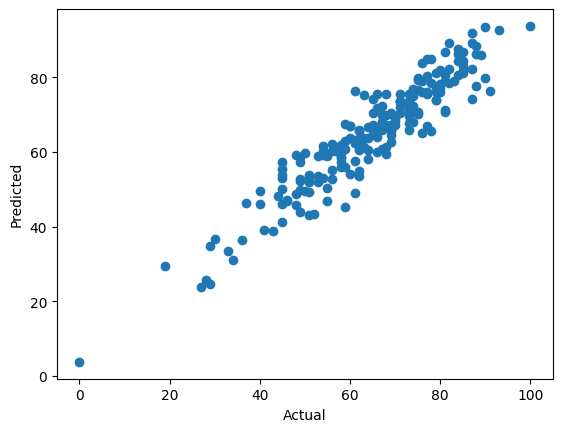

In [60]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

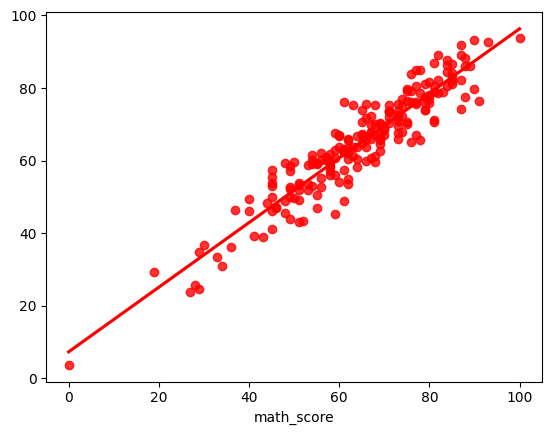

In [61]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

#### Difference between Actual and Predicted Values 

In [62]:
pred_df = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

Actual Value  Predicted Value  Difference
521            91        76.387970   14.612030
737            53        58.885970   -5.885970
740            80        76.990265    3.009735
660            74        76.851804   -2.851804
411            84        87.627378   -3.627378
..            ...              ...         ...
408            52        43.409149    8.590851
332            62        62.152214   -0.152214
208            74        67.888395    6.111605
613            65        67.022287   -2.022287
78             61        62.345132   -1.345132

[200 rows x 3 columns]